# Data Understanding and Preprocessing

## Importing Dataset

Dataset from: https://d2l.udst.edu.qa/d2l/login?sessionExpired=0&target=%2fd2l%2fle%2fcontent%2f136863%2fviewContent%2f3130847%2fView

In [1]:
'''
=========================================================================================
UJIIndoorLoc Dataset:
=========================================================================================
The UJIIndoorLoc is a Multi-Building Multi-Floor indoor localization database to test Indoor Positioning System that rely on WLAN/WiFi fingerprint

J. Torres-Sospedra, R. Montoliu, A. Martnez-Us, T. Arnau, and J. Avariento. "UJIIndoorLoc," UCI Machine Learning Repository, 2014. [Online]. Available: https://doi.org/10.24432/C5MS59.

Attribute 001 (WAP001): Intensity value for WAP001. Negative integer values from -104 to 0 and +100 (closer to 0 mean closer) Positive value 100 used if WAP001 was not detected.
....WAP002...WAP003... to WAP00520
Attribute 520 (WAP520): Intensity value for WAP520. Negative integer values from -104 to 0 and +100. Positive Vvalue 100 used if WAP520 was not detected.
Attribute 521 (LONGITUDE): Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000
Attribute 522 (LATITUDE): Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.
Attribute 523 (FLOOR): Altitude in floors inside the building. Integer values from 0 to 4.
Attribute 524 (BUILDINGID): ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.
Attribute 525 (SPACEID): Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.
Attribute 526 (RELATIVEPOSITION): Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values. 
Attribute 527 (USERID): User identifier (see below). Categorical integer values. 
Attribute 528 (PHONEID): Android device identifier (see below). Categorical integer values.  
Attribute 529 (TIMESTAMP): UNIX Time when the capture was taken. Integer value. 
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./UJIndoorLoc/trainingData.csv")
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


## Dataset Exploration

### General exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from collections import Counter

In [3]:
descriptive_stats = df.describe()
descriptive_stats

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [4]:
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
df[RSSI_columns] = df[RSSI_columns].replace(100, -105) # So the range will be -105 to 0 and the values with 100 will turn into 105

other_columns = ["LONGITUDE", "LATITUDE", "FLOOR", "BUILDINGID", "SPACEID", 
                   "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"]

In [5]:
df[RSSI_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 520 entries, WAP001 to WAP520
dtypes: int64(520)
memory usage: 79.1 MB


In [6]:
df[other_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LONGITUDE         19937 non-null  float64
 1   LATITUDE          19937 non-null  float64
 2   FLOOR             19937 non-null  int64  
 3   BUILDINGID        19937 non-null  int64  
 4   SPACEID           19937 non-null  int64  
 5   RELATIVEPOSITION  19937 non-null  int64  
 6   USERID            19937 non-null  int64  
 7   PHONEID           19937 non-null  int64  
 8   TIMESTAMP         19937 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.4 MB


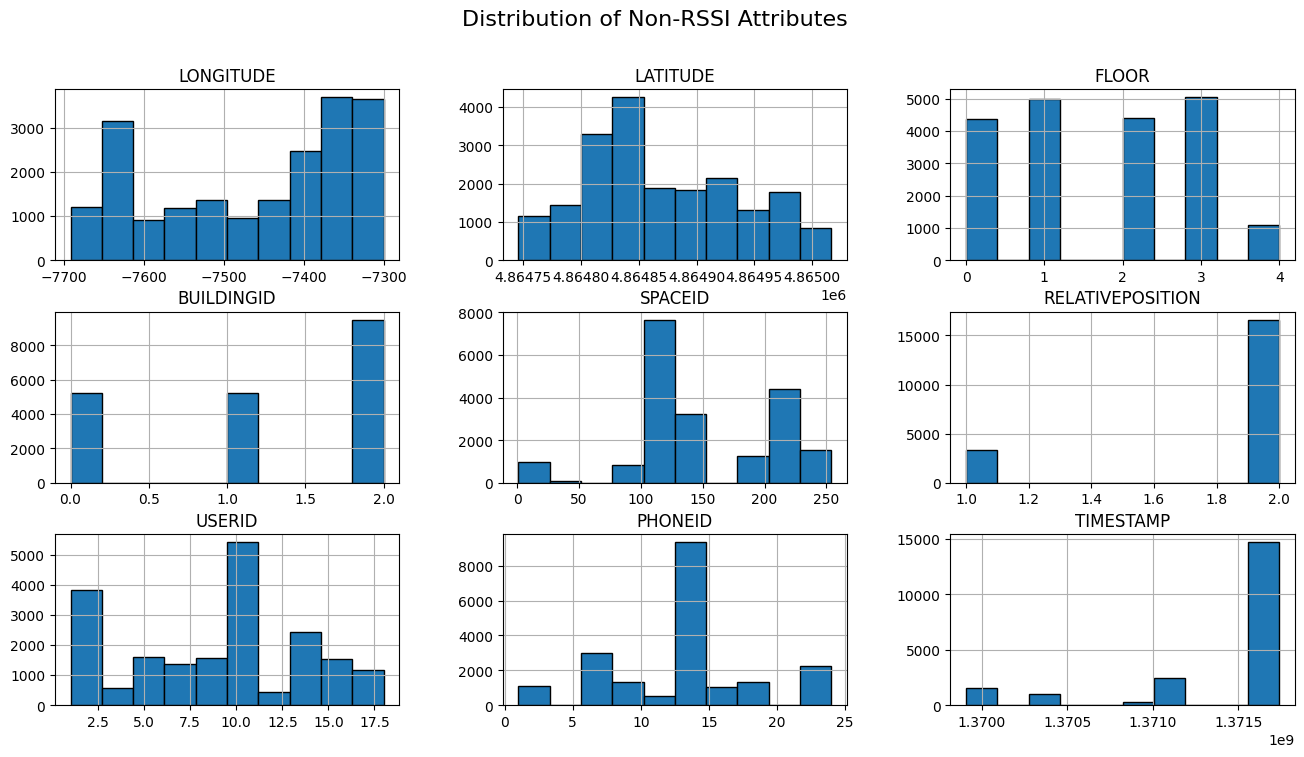

In [7]:
# Histograms for each Non-RSSI attribute
df[other_columns].hist(figsize=(16, 8), edgecolor='black')
plt.suptitle("Distribution of Non-RSSI Attributes", fontsize=16)
plt.show()


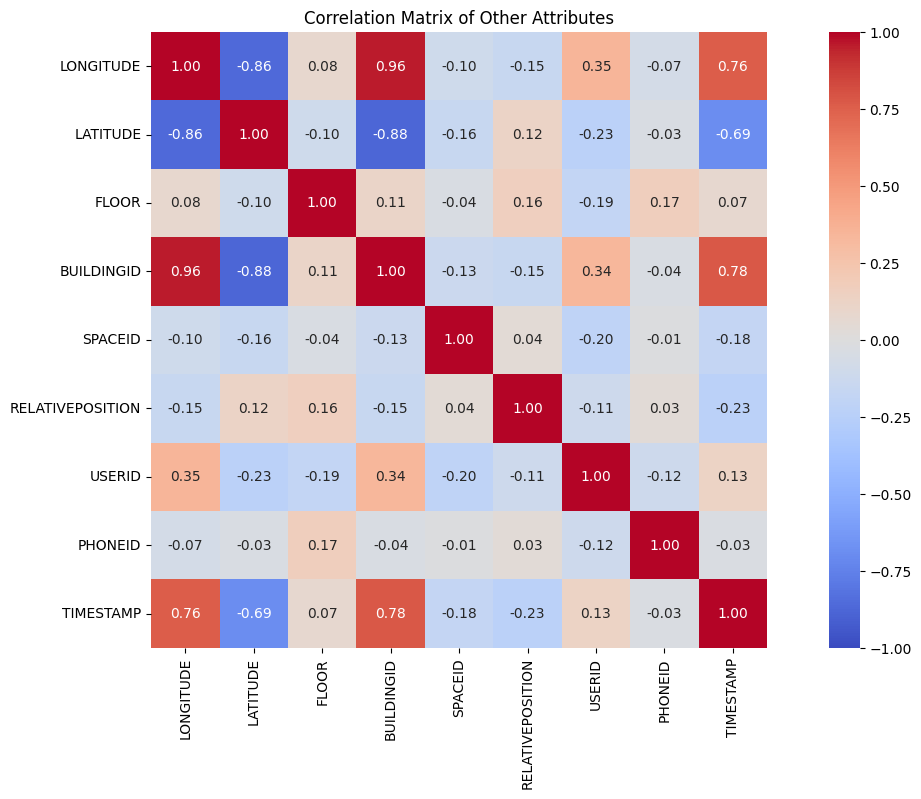

In [8]:
# Correlation matrix 
plt.figure(figsize=(16, 8))
sns.heatmap(df[other_columns].corr(), cmap="coolwarm", annot=True, fmt=".2f", center=0, vmax= 1, vmin=-1, square=True)
plt.title("Correlation Matrix of Other Attributes")
plt.show()


In [9]:
# # Pairplot for FLOOR 
# pairplot1 = sns.pairplot(df[other_columns], hue="FLOOR")
# pairplot1.fig.suptitle("Pairplot of Other Attributes (Colored by FLOOR)")

# # Pairplot for BUILDINGID
# pairplot2 = sns.pairplot(df[other_columns], hue="BUILDINGID")
# pairplot2.fig.suptitle("Pairplot of Other Attributes (Colored by BUILDINGID)")

# plt.show()


### Floor and Buildings

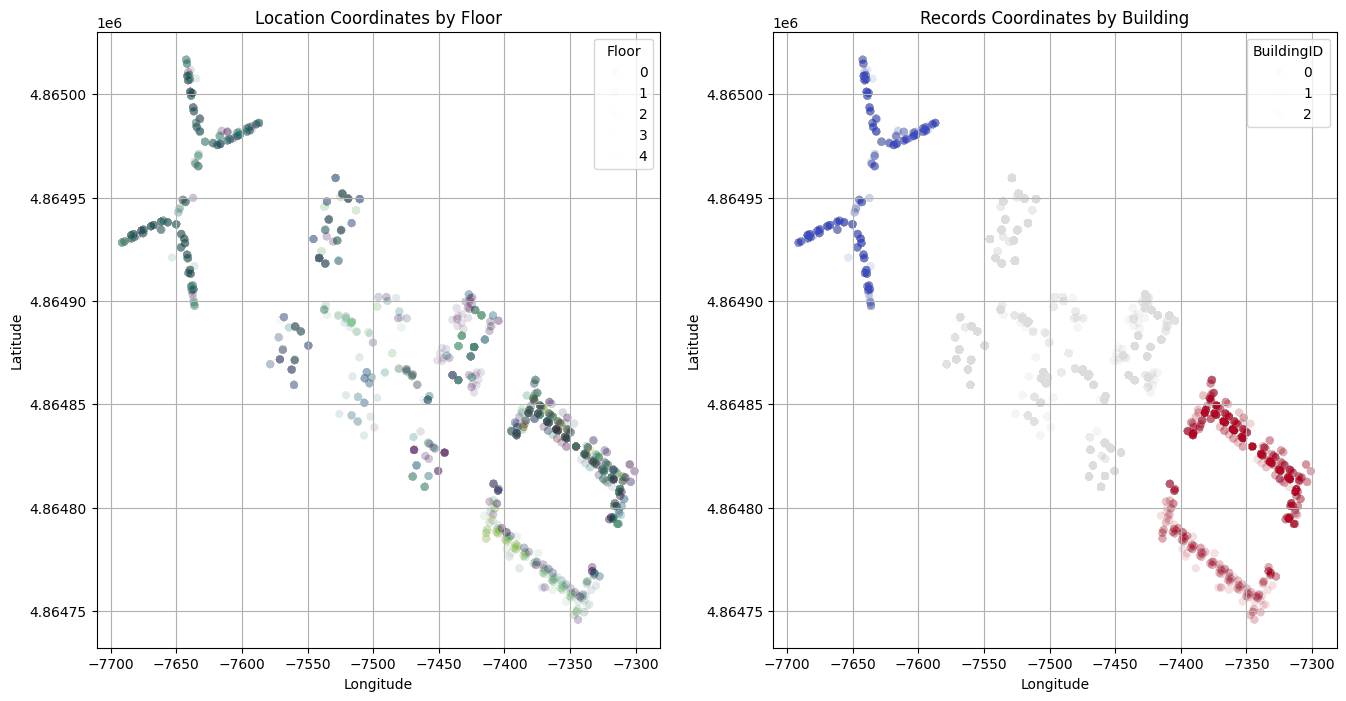

In [10]:
# Scatter plot of Longitude vs Latitude colored by Floor and By building
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["FLOOR"], alpha=0.01, palette="viridis")
plt.title("Location Coordinates by Floor")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Floor")
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["BUILDINGID"], alpha=0.01, palette="coolwarm")
plt.title("Records Coordinates by Building")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="BuildingID")
plt.grid()
plt.show()

In [11]:
unique_floors = sorted(df['FLOOR'].unique())
unique_buildings = sorted(df['BUILDINGID'].unique())

print("unique_floors:", unique_floors)
print("unique_buildings:", unique_buildings)

unique_floors: [0, 1, 2, 3, 4]
unique_buildings: [0, 1, 2]


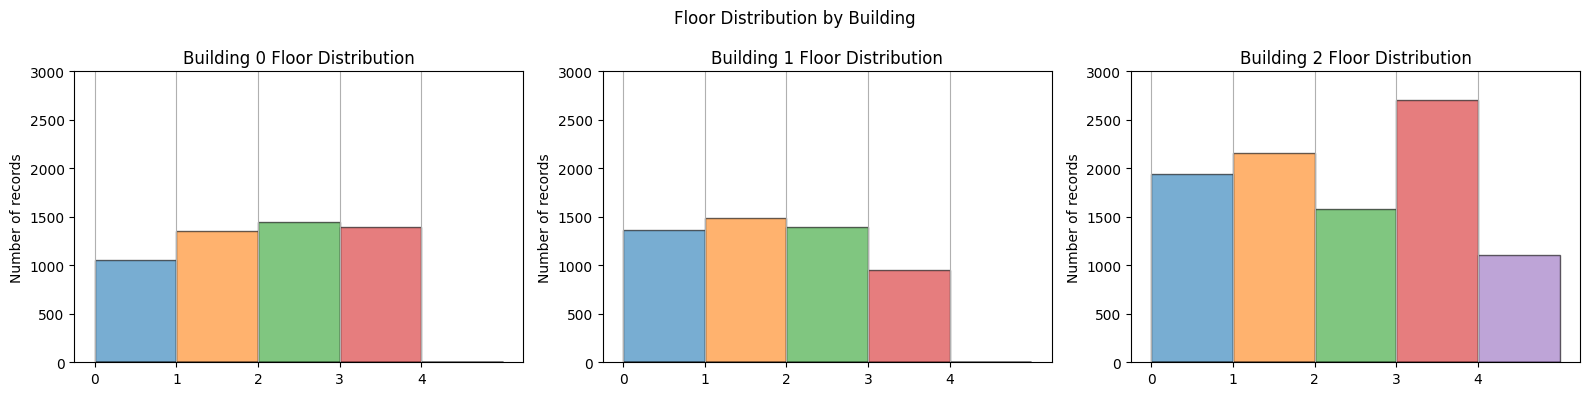

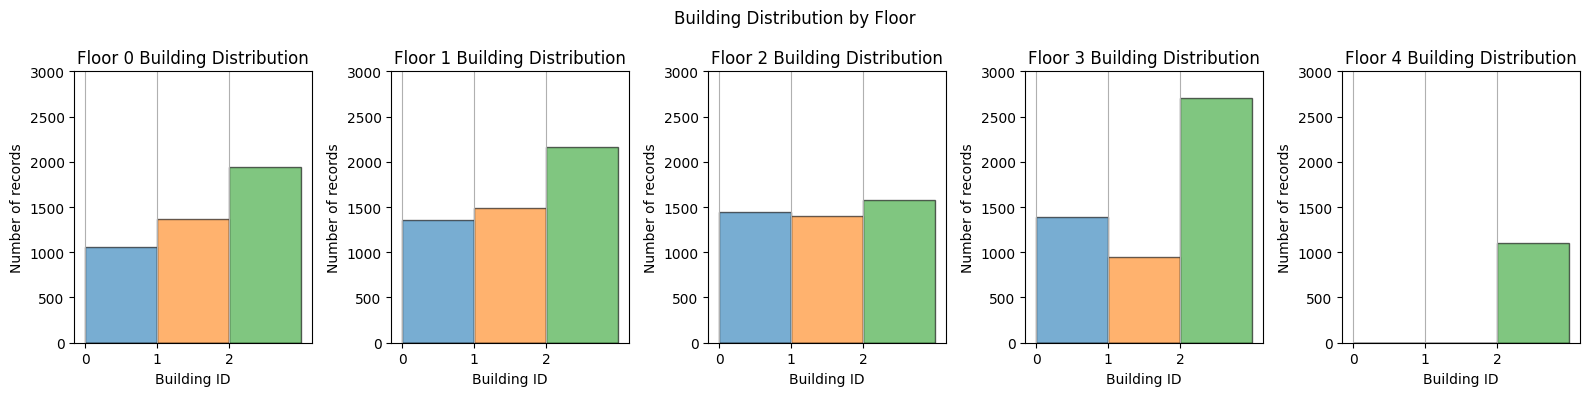

In [12]:
# Floor Distribution by Building
plt.figure(figsize=(16, 4))

for building in unique_buildings:
    plt.subplot(1, len(unique_buildings), building+1)  # Subplot per building
    for floor in unique_floors:
        df[(df["BUILDINGID"] == building) & (df["FLOOR"] == floor)]["FLOOR"].hist(
            alpha=0.6, bins=range(df["FLOOR"].min(), df["FLOOR"].max() + 2),
            edgecolor='black', label=f'Floor {floor}'
        )
    plt.title(f"Building {building} Floor Distribution")
    plt.ylabel("Number of records")
    plt.ylim(top=3000)
    plt.xticks(unique_floors)
    plt.grid(axis='y')

plt.suptitle("Floor Distribution by Building")
plt.tight_layout()
plt.show()

# Building Distribution by Floor
plt.figure(figsize=(16, 4))

for floor in unique_floors:
    plt.subplot(1, len(unique_floors), floor+1)  # Subplot per floor
    for building in unique_buildings:
        df[(df["FLOOR"] == floor) & (df["BUILDINGID"] == building)]["BUILDINGID"].hist(
            alpha=0.6, bins=range(df["BUILDINGID"].min(), df["BUILDINGID"].max() + 2),
            edgecolor='black', label=f'Building {building}'
        )
    plt.title(f"Floor {floor} Building Distribution")
    plt.xlabel("Building ID")
    plt.ylabel("Number of records")
    plt.ylim(top=3000)
    plt.xticks(unique_buildings)
    plt.grid(axis='y')

plt.suptitle("Building Distribution by Floor")
plt.tight_layout()
plt.show()


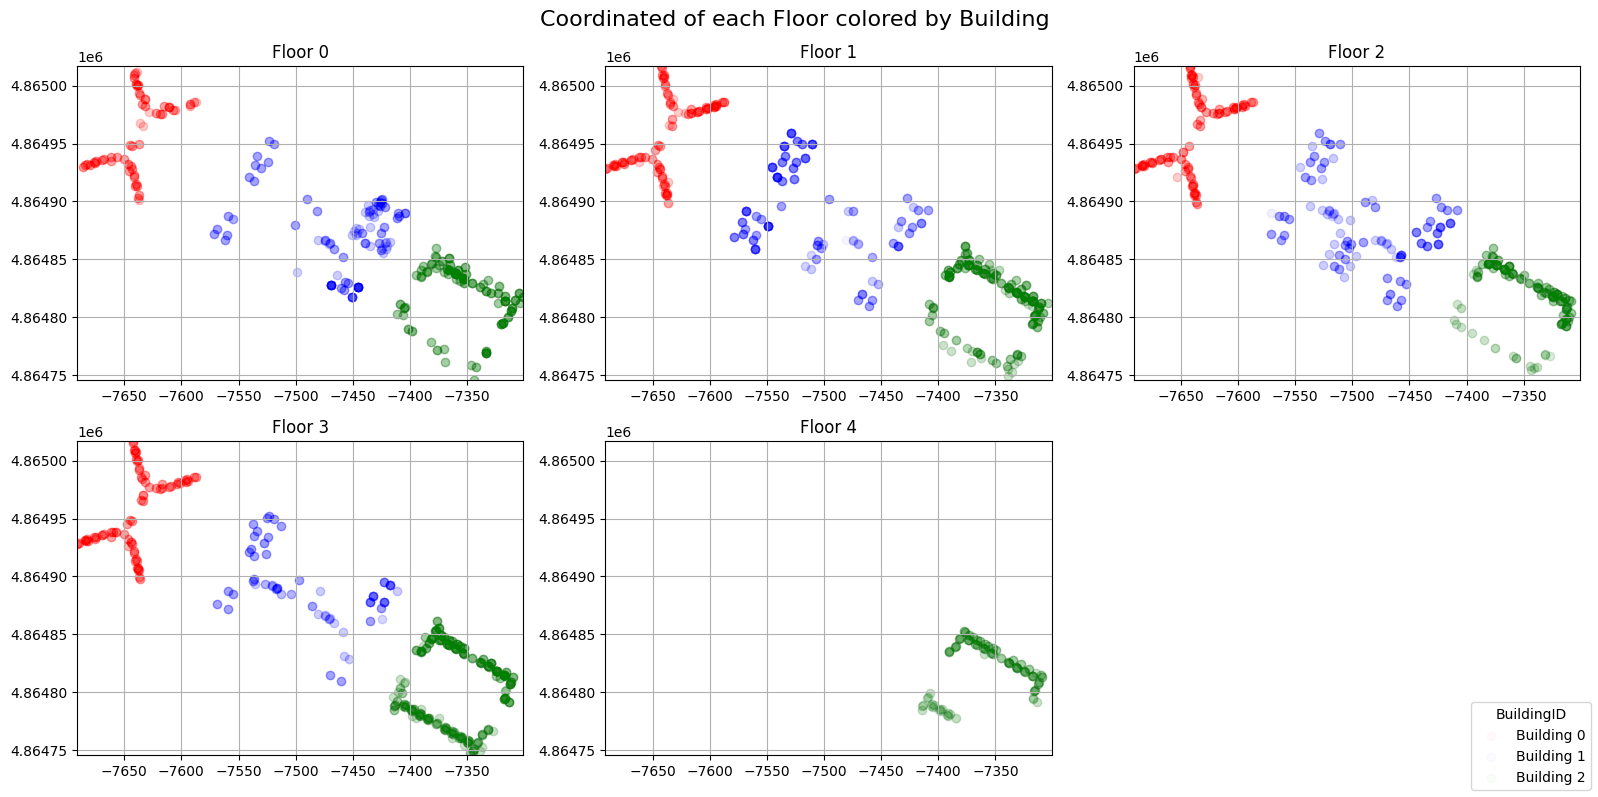

In [13]:
# Get consistent axis limits
x_min, x_max = df['LONGITUDE'].min(), df['LONGITUDE'].max()
y_min, y_max = df['LATITUDE'].min(), df['LATITUDE'].max()

# Define unique buildings and their corresponding colors
unique_buildings = sorted(df['BUILDINGID'].unique())
building_colors = {0: "red", 1: "blue", 2: "green"}

fig = plt.figure(figsize=(16, 8))
for floor in unique_floors:
    plt.subplot(2, 3, floor + 1)  # 2 rows, 3 columns, current plot index
    floor_data = df[df['FLOOR'] == floor]

    for building in unique_buildings:
        # Scatter plot with specific building color
        building_data = floor_data[floor_data['BUILDINGID'] == building]  

        plt.scatter(
            building_data['LONGITUDE'], building_data['LATITUDE'], 
            color=building_colors[building], alpha=0.02, label=f'Building {building}'
        )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.title(f'Floor {floor}')
    # plt.xlabel('Longitude')
    # plt.ylabel('Latitude')
    plt.grid(True)

# Create a legend for buildings
labels = [f'Building {building}' for building in unique_buildings]
fig.legend(labels, loc='lower right', title='BuildingID')

# Adjust layout for better visualization
plt.suptitle('Coordinated of each Floor colored by Building', fontsize=16)
plt.tight_layout()
plt.show()


In [14]:
# Joy: ====================================================================================
# Now I have an overview of how the buildings and floor look like
# =========================================================================================

### WAP columns

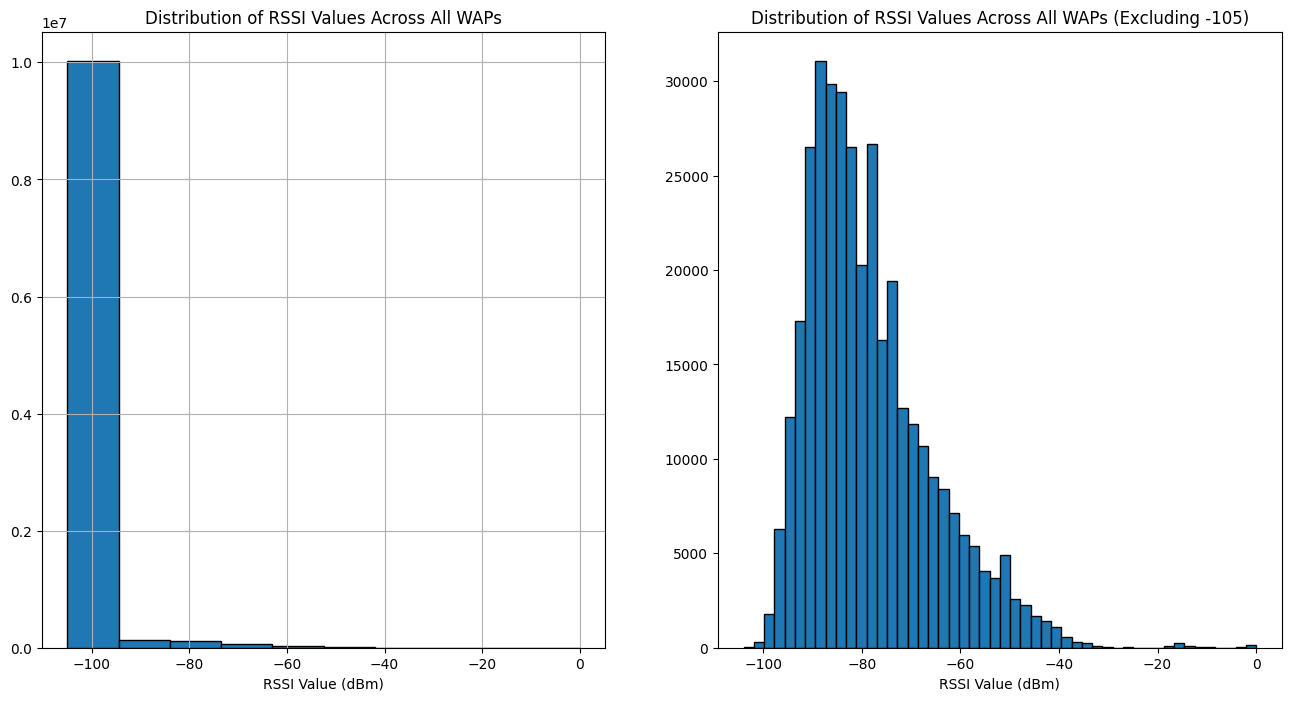

In [15]:
# Histogram of RSSI values
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
df[RSSI_columns].stack().hist(edgecolor='black')
plt.title("Distribution of RSSI Values Across All WAPs")
plt.xlabel("RSSI Value (dBm)")

# Histogram of RSSI values (excluding no signals)
plt.subplot(1,2,2)
df[RSSI_columns][df[RSSI_columns] != -105].stack().hist(edgecolor='black', bins=50)
plt.title("Distribution of RSSI Values Across All WAPs (Excluding -105)")
plt.xlabel("RSSI Value (dBm)")
plt.grid()
plt.show()

In [16]:
# Joy: ====================================================================================
# I want to understand if the WAP columns are floor or building specific
# =========================================================================================

In [17]:
WAP_floor_not_detected = []
WAP_floors = {}  

for WAP in RSSI_columns:
    detected_floors = sorted(df[df[WAP] != -105]["FLOOR"].unique())
    if len(detected_floors)==0: WAP_floor_not_detected.append(WAP)
    print(f"{WAP} is detected on floors: {detected_floors}")
    WAP_floors[WAP] = len(detected_floors)

print("\nWAPs not detected on any floor:")
print(WAP_floor_not_detected)


WAP001 is detected on floors: [2, 3]
WAP002 is detected on floors: [2, 3]
WAP003 is detected on floors: []
WAP004 is detected on floors: []
WAP005 is detected on floors: [2, 3, 4]
WAP006 is detected on floors: [0, 1, 2, 3]
WAP007 is detected on floors: [0, 1, 2, 3]
WAP008 is detected on floors: [0, 1, 2, 3]
WAP009 is detected on floors: [0, 1, 2, 3]
WAP010 is detected on floors: [1, 2, 3]
WAP011 is detected on floors: [1, 2, 3, 4]
WAP012 is detected on floors: [1, 2, 3, 4]
WAP013 is detected on floors: [0, 1, 2, 3]
WAP014 is detected on floors: [0, 1, 2, 3]
WAP015 is detected on floors: [0, 1, 2, 3]
WAP016 is detected on floors: [0, 1, 2, 3]
WAP017 is detected on floors: [0, 1, 2, 3]
WAP018 is detected on floors: [0, 1, 2, 3]
WAP019 is detected on floors: [0, 1, 2, 3]
WAP020 is detected on floors: [0, 1, 2, 3]
WAP021 is detected on floors: [1, 2, 3]
WAP022 is detected on floors: [2, 3]
WAP023 is detected on floors: [0, 1, 2, 3]
WAP024 is detected on floors: [0, 1, 2, 3]
WAP025 is detec

In [18]:
# Joy: ====================================================================================
# WAPs are not floor specific. Some dont even show any floors
# =========================================================================================

In [19]:
WAP_building_not_detected = []  
WAP_buildings = {}

for WAP in RSSI_columns:
    detected_buildings = sorted(df[df[WAP] != -105]["BUILDINGID"].unique())
    if len(detected_buildings)==0: WAP_building_not_detected.append(WAP)
    print(f"{WAP} is detected in buildings: {detected_buildings}")
    WAP_buildings[WAP]= len(detected_buildings)

print("\nWAPs not detected in any building:")
print(WAP_building_not_detected)


WAP001 is detected in buildings: [0]
WAP002 is detected in buildings: [0]
WAP003 is detected in buildings: []
WAP004 is detected in buildings: []
WAP005 is detected in buildings: [2]
WAP006 is detected in buildings: [1, 2]
WAP007 is detected in buildings: [0]
WAP008 is detected in buildings: [0, 1]
WAP009 is detected in buildings: [0]
WAP010 is detected in buildings: [1]
WAP011 is detected in buildings: [1, 2]
WAP012 is detected in buildings: [1, 2]
WAP013 is detected in buildings: [0]
WAP014 is detected in buildings: [0]
WAP015 is detected in buildings: [1]
WAP016 is detected in buildings: [1]
WAP017 is detected in buildings: [0, 1]
WAP018 is detected in buildings: [0, 2]
WAP019 is detected in buildings: [0]
WAP020 is detected in buildings: [0]
WAP021 is detected in buildings: [1]
WAP022 is detected in buildings: [1]
WAP023 is detected in buildings: [0, 1]
WAP024 is detected in buildings: [0, 1]
WAP025 is detected in buildings: [0]
WAP026 is detected in buildings: [0]
WAP027 is detect

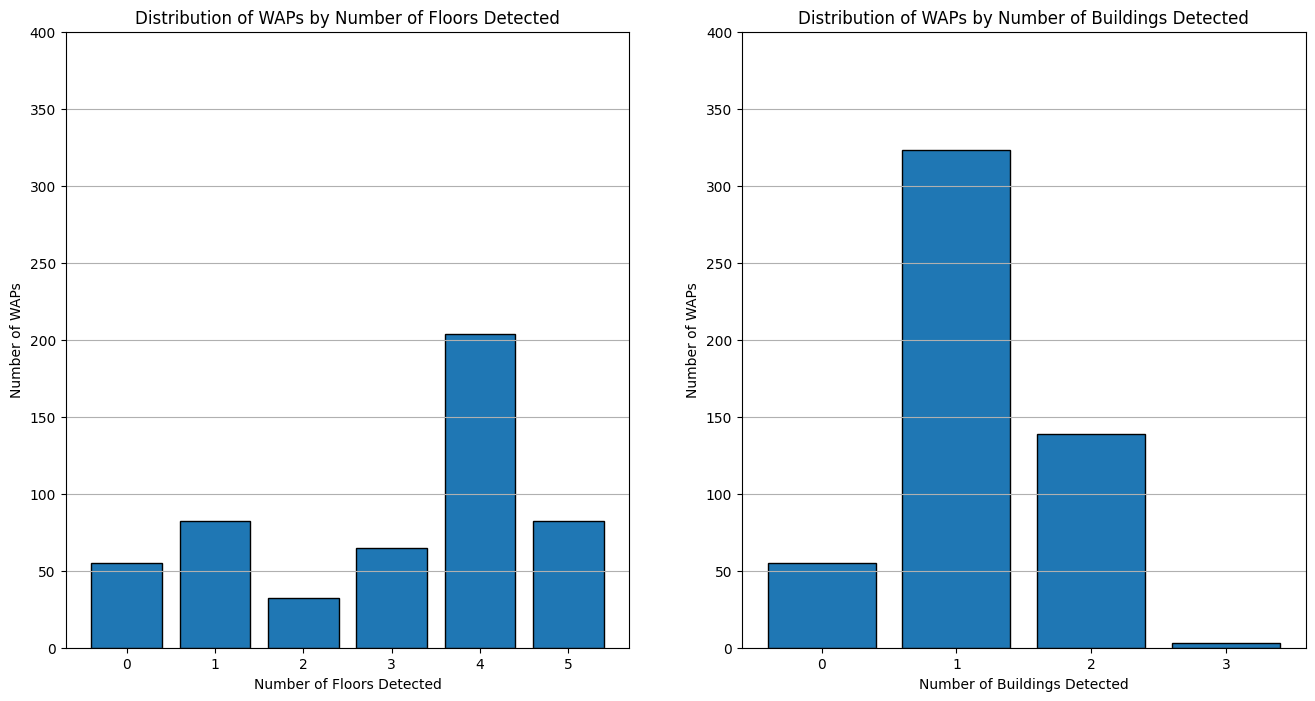

In [20]:
# Distribution of WAPs by Number of Floors Detected
floor_counts = {}
for wap, num_floors in WAP_floors.items():
    if num_floors not in floor_counts:
        floor_counts[num_floors] = 0
    floor_counts[num_floors] += 1

sorted_keys = sorted(floor_counts.keys())
sorted_values = [floor_counts[key] for key in sorted_keys]

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(sorted_keys, sorted_values, edgecolor="black")
plt.xlabel("Number of Floors Detected")
plt.ylabel("Number of WAPs")
plt.ylim(top=400)
plt.title("Distribution of WAPs by Number of Floors Detected")
plt.xticks(sorted_keys)
plt.grid(axis="y")

# Distribution of WAPs by Number of Buildings Detected
building_counts = {}
for wap, num_buildings in WAP_buildings.items():
    if num_buildings not in building_counts:
        building_counts[num_buildings] = 0
    building_counts[num_buildings] += 1

sorted_keys = sorted(building_counts.keys())
sorted_values = [building_counts[key] for key in sorted_keys]

plt.subplot(1,2,2)
plt.bar(sorted_keys, sorted_values, edgecolor="black")
plt.xlabel("Number of Buildings Detected")
plt.ylabel("Number of WAPs")
plt.ylim(top=400)
plt.title("Distribution of WAPs by Number of Buildings Detected")
plt.xticks(sorted_keys)
plt.grid(axis="y")
plt.show()


In [21]:
# Joy: ====================================================================================
# WAPs are not building specific either. This is probably because the signal can travel far 
# in gaps or the area might be open. The list of WAP not detected might be the same as 
# we can remove those
# =========================================================================================

In [22]:
# Check if both lists contain the same WAPs
if set(WAP_building_not_detected) == set(WAP_floor_not_detected):
    print("Both `WAP_building_not_detected` and `WAP_floor_not_detected` are identical. The same WAPs are not detected in any building or floor.")
else:
    print("The lists are different. Some WAPs are missing in buildings but detected in floors, or vice versa.")

# Drop WAPs that are not detected in any building or floor
df.drop(columns=WAP_building_not_detected, inplace=True)
print(f"Dropped {len(WAP_building_not_detected)} WAP columns that were never detected.")
print("Reloading the new WAP column list...")
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]

Both `WAP_building_not_detected` and `WAP_floor_not_detected` are identical. The same WAPs are not detected in any building or floor.
Dropped 55 WAP columns that were never detected.
Reloading the new WAP column list...


In [23]:
# Joy: ====================================================================================
# Yes, they are the same. I deleted them as they won't help with anything
# Now, I still want to know if the WAP values can help predict building and floor I'll 
# visualize a a few RSSI signal by floor and by building
# =========================================================================================

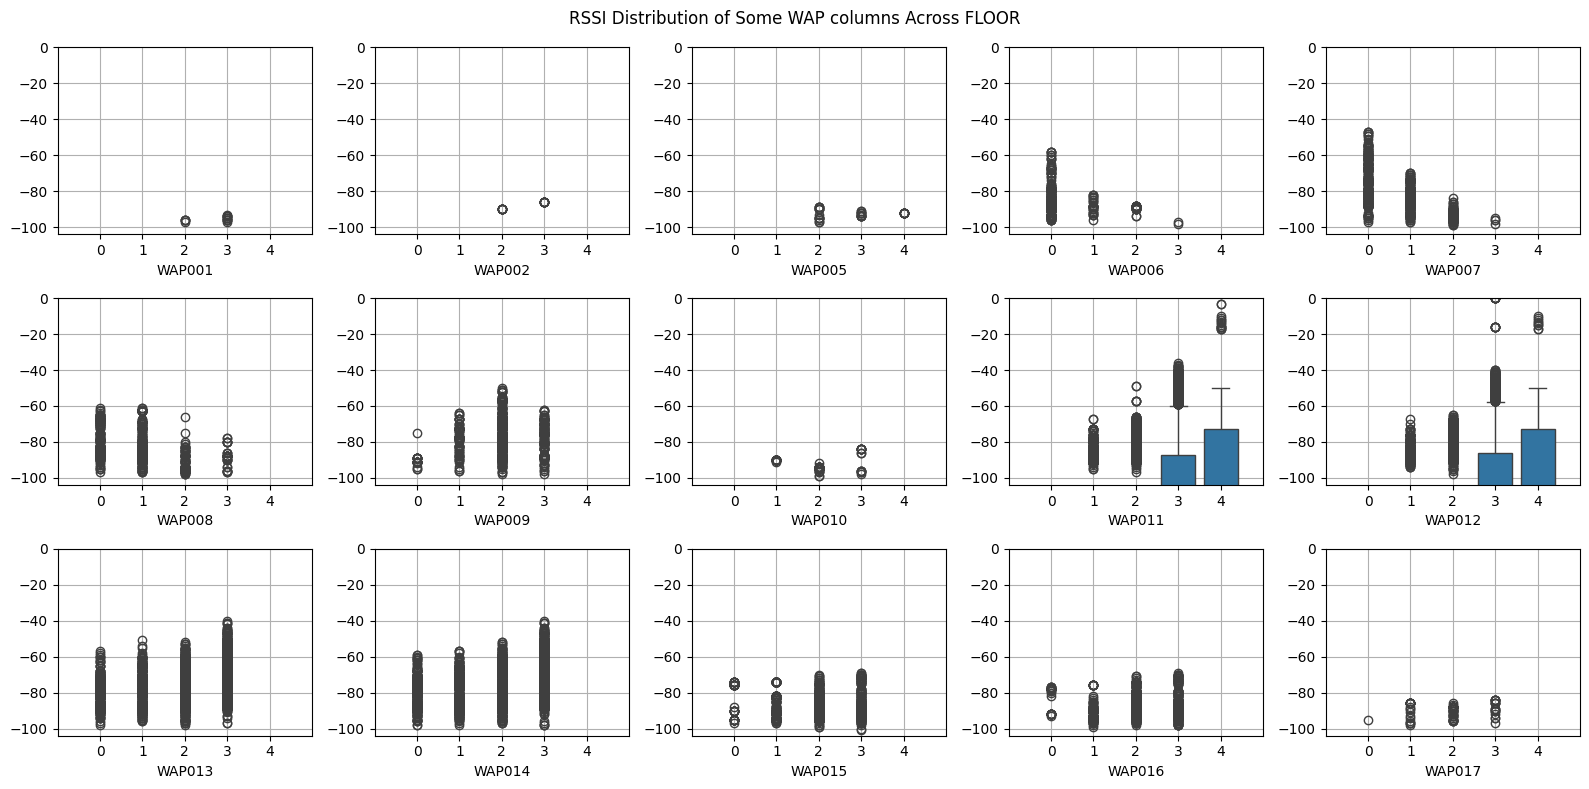

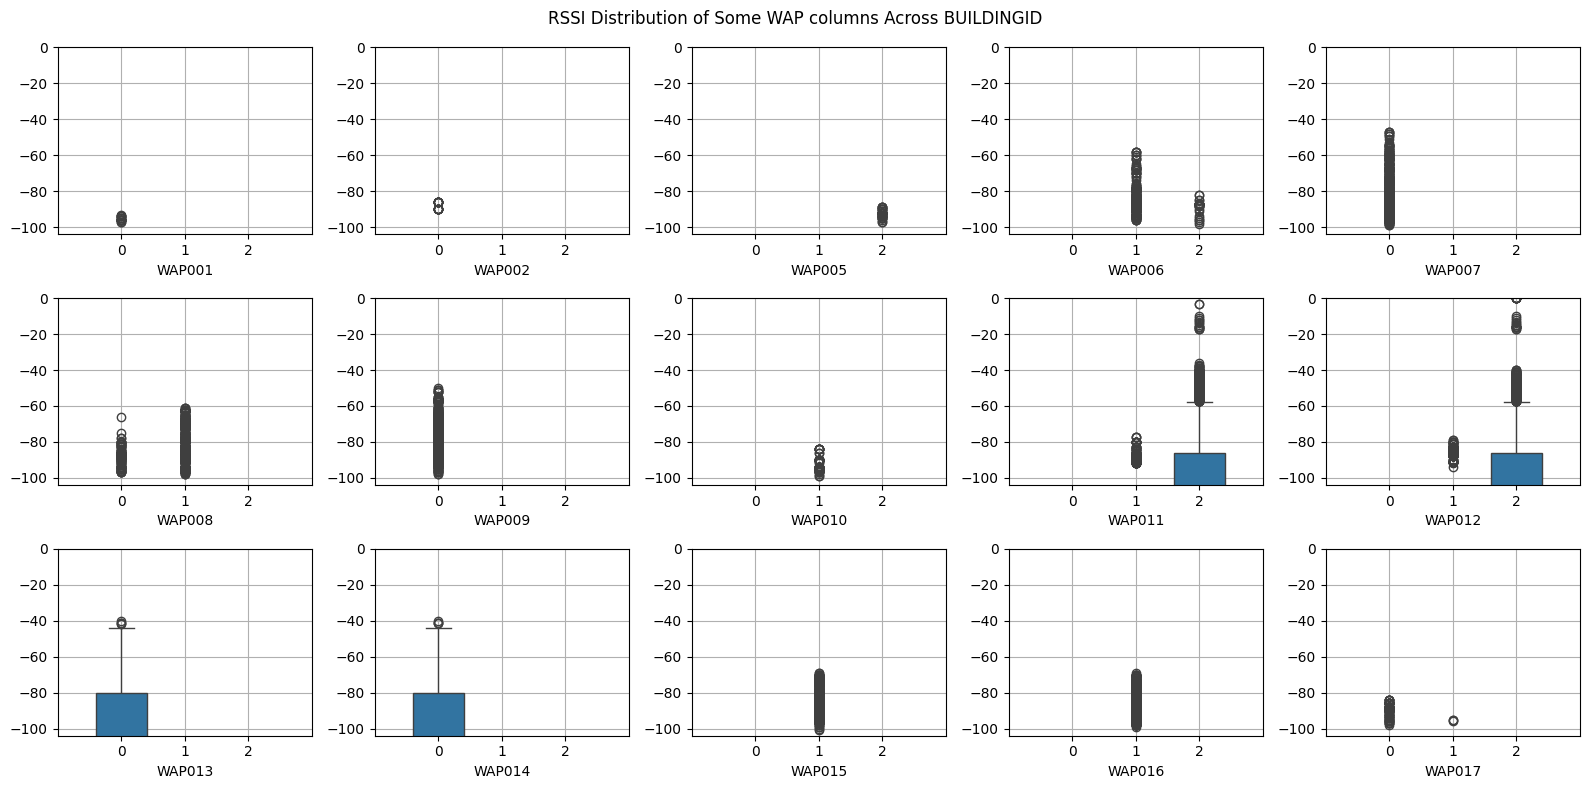

In [24]:
columns = 5
rows = 3

plt.figure(figsize=(16, 8))
for idx, wap_to_check in enumerate(RSSI_columns[:rows*columns], start=1):
    plt.subplot(rows, columns, idx)
    # Plot RSSI distribution across floors
    sns.boxplot(x=df["FLOOR"], y=df[wap_to_check])
    plt.xlabel(wap_to_check)
    plt.ylabel(None)
    plt.xlim(-1, 5)
    plt.ylim(-104, 0)
    plt.grid()
plt.suptitle(f"RSSI Distribution of Some WAP columns Across FLOOR")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
for idx, wap_to_check in enumerate(RSSI_columns[:rows*columns], start=1):
    plt.subplot(rows, columns, idx)
    # Plot RSSI distribution across floors
    sns.boxplot(x=df["BUILDINGID"], y=df[wap_to_check])
    plt.xlabel(wap_to_check)
    plt.ylabel(None)
    plt.xlim(-1, 3)
    plt.ylim(-104, 0)
    plt.grid()
plt.suptitle(f"RSSI Distribution of Some WAP columns Across BUILDINGID")
plt.tight_layout()
plt.show()


In [25]:
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [26]:
# for index, row in df.iterrows():
#     detected_waps = [WAP for WAP in RSSI_columns if row[WAP] != -105]
#     print(f"Record {index}: Detected WAPs → {detected_waps}")

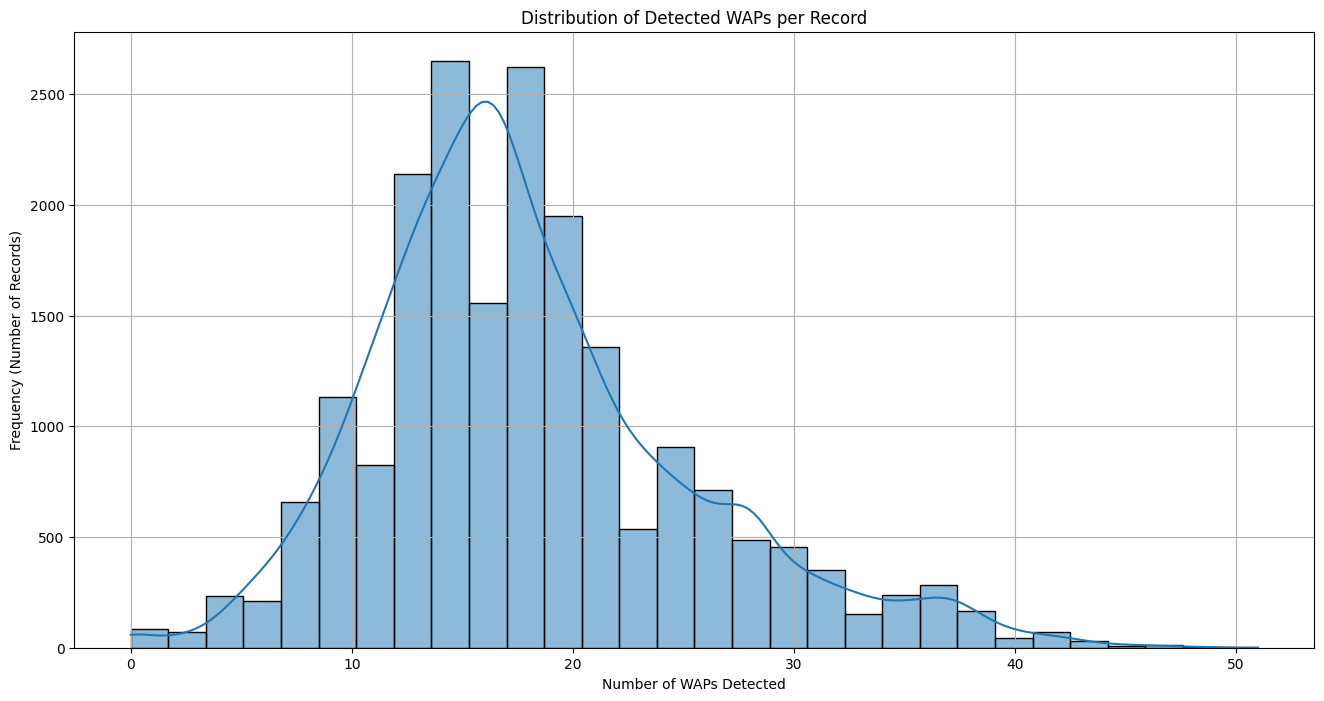

In [27]:
# Count detected WAPs per record
num_waps_detected = [len([WAP for WAP in RSSI_columns if row[WAP] != -105]) for _, row in df.iterrows()]

# Plot histogram
plt.figure(figsize=(16,8))
sns.histplot(num_waps_detected, bins=30, kde=True)
plt.xlabel("Number of WAPs Detected")
plt.ylabel("Frequency (Number of Records)")
plt.title("Distribution of Detected WAPs per Record")
plt.grid()
plt.show()


In [28]:
# # Get unique floors
# unique_floors = sorted(df["FLOOR"].unique())

# # Dictionary to store top WAPs per floor
# top_waps_per_floor = {}

# # Loop through each floor to find the most frequently detected WAPs
# for floor in unique_floors:
#     # Filter records for the specific floor
#     floor_df = df[df["FLOOR"] == floor]

#     # Count WAP appearances in the floor's records
#     wap_counts = Counter(WAP for _, row in floor_df.iterrows() for WAP in RSSI_columns if row[WAP] != -105)

#     # Get the top 10 most frequently detected WAPs
#     top_waps = sorted(wap_counts.items(), key=lambda x: x[1], reverse=True)[:25]
#     top_waps_per_floor[floor] = top_waps

# # Plot bar charts for each floor
# plt.figure(figsize=(16, 8))

# for idx, floor in enumerate(unique_floors, start=1):
#     plt.subplot(1, 5, idx)  # Create subplots
#     waps, counts = zip(*top_waps_per_floor[floor])
#     plt.bar(waps, counts, color="blue", alpha=0.7, edgecolor="black")
#     plt.xticks(rotation=90, fontsize=8)
#     plt.xlabel(f"floor {floor}")
#     # plt.ylabel("Number of Records Detected")
#     plt.grid(axis="y")

# plt.suptitle(f"Top 10 Most Frequent WAPs - Each Floor")
# plt.tight_layout()
# plt.show()


In [29]:
# Joy: ====================================================================================
# Each record receives at multiple signals access points too. I think we can feature
# engineer to map the max RSSI on a 
# =========================================================================================

In [30]:
# RSSI_multifloor = [] 
# for WAP in RSSI_columns:
#     max_value = df[WAP].max() 
#     max_floors = sorted(df[df[WAP] == max_value]["FLOOR"].unique())  

#     # If the WAP originally had high signals on multiple floors, add to list
#     if len(max_floors) > 1: RSSI_multifloor.append(WAP)
        
#     # If there are more than 1 floor for a max_value then check the next highest
#     while len(max_floors) > 1:
#         max_value = df[df[WAP] < max_value][WAP].max()  # Find the next highest RSSI
#         max_floors = sorted(df[df[WAP] == max_value]["FLOOR"].unique())  

#     print(f"{WAP} has max RSSI {max_value:>3} detected on floors: {max_floors}")
# print("RSSI_multifloor (WAPs that have high signals on multiple floors):", RSSI_multifloor)

# WAP_multibuilding = [] 
# for WAP in RSSI_columns:
#     max_value = df[WAP].max() 
#     max_buildings = sorted(df[df[WAP] == max_value]["BUILDINGID"].unique())  

#     # If the WAP originally had high signals on multiple buildings, add to list
#     if len(max_buildings) > 1: WAP_multibuilding.append(WAP)
        
#     # If there are more than 1 building for a max_value then check the next highest
#     while len(max_buildings) > 1:
#         max_value = df[df[WAP] < max_value][WAP].max()  # Find the next highest RSSI
#         max_buildings = sorted(df[df[WAP] == max_value]["BUILDINGID"].unique())  

#     print(f"{WAP} has max RSSI {max_value:>3} detected on buildings: {max_buildings}")
# print("WAP_multibuilding (WAPs that have high signals on multiple buildings):", RSSI_multifloor)



## Data Cleaning and Preparation

In [31]:
"""
Data Cleaning and Preparation:
    Handle any missing values and normalize the RSSI measurements.
    Scale features appropriately and encode any categorical variables if needed.
    Optionally, apply feature reduction techniques (e.g., PCA) to reduce noise and improve model efficiency.

"""

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df[other_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LONGITUDE         19937 non-null  float64
 1   LATITUDE          19937 non-null  float64
 2   FLOOR             19937 non-null  int64  
 3   BUILDINGID        19937 non-null  int64  
 4   SPACEID           19937 non-null  int64  
 5   RELATIVEPOSITION  19937 non-null  int64  
 6   USERID            19937 non-null  int64  
 7   PHONEID           19937 non-null  int64  
 8   TIMESTAMP         19937 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.4 MB


### Missing values

In [32]:
df.isna().sum().any()

False

In [33]:
# Joy: ====================================================================================
# There are no missing values and the not-detected WAP are already converted from 100 to -105 
# =========================================================================================

### Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[RSSI_columns] = scaler.fit_transform(df[RSSI_columns])

scaler_coords = MinMaxScaler(feature_range=(0, 1))
df[["LONGITUDE", "LATITUDE"]] = scaler_coords.fit_transform(df[["LONGITUDE", "LATITUDE"]])

In [35]:
# Joy: ====================================================================================
# Standard Scaling, MinMaxScaler does not assume a normal distribution and scaling the 
# coordinates will improve distance-based models like SVM, Neural Networks
# =========================================================================================

In [36]:
categorical_columns = ["BUILDINGID", "FLOOR"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
building_columns = [col for col in df.columns if col.startswith("BUILDINGID")]
floor_columns = [col for col in df.columns if col.startswith("FLOOR")]

### PCA

In [37]:
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(df[RSSI_columns])

# Summary of data processing
num_original_features = len(RSSI_columns)
num_components = pca.n_components_
num_features_removed = num_original_features - num_components

print(f"Data Cleaning and Preparation Completed.")
print(f"PCA removed {num_features_removed} of the original {num_original_features} RSSI columns")


Data Cleaning and Preparation Completed.
PCA removed 298 of the original 465 RSSI columns


In [38]:
df_pca = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(num_components)])

# Add non-RSSI columns back if needed
df_pca["LONGITUDE"] = df["LONGITUDE"]
df_pca["LATITUDE"] = df["LATITUDE"]
df_pca[building_columns] = df[building_columns]
df_pca[floor_columns] = df[floor_columns]

df_pca.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_166,PCA_167,LONGITUDE,LATITUDE,BUILDINGID_1,BUILDINGID_2,FLOOR_1,FLOOR_2,FLOOR_3,FLOOR_4
0,0.113872,0.025619,0.175059,0.696618,0.379238,-0.333301,1.272969,0.357313,0.051137,-0.399208,...,-0.003532,0.004523,0.384294,0.646015,1,0,0,1,0,0
1,0.107321,0.025230,0.160788,0.646997,0.353115,-0.295829,1.139038,0.315768,-0.028676,-0.290573,...,-0.016020,0.007954,0.396183,0.695646,1,0,0,1,0,0
2,0.038747,0.001399,0.177835,0.546049,0.191126,-0.327867,0.958327,0.238142,0.277187,-0.267378,...,-0.009463,0.014025,0.440915,0.752141,1,0,0,1,0,0
3,0.120268,0.026108,0.207935,0.693314,0.302354,-0.279097,1.204659,0.277865,0.225793,-0.549166,...,-0.017145,0.017909,0.427042,0.695158,1,0,0,1,0,0
4,0.052954,0.014135,0.043840,0.159255,0.024035,-0.022076,0.047522,-0.051472,-0.108323,0.017206,...,0.001996,-0.000548,0.151580,0.872775,0,0,0,0,0,0


In [39]:
# Joy: ====================================================================================
# For model testing we will preserve the real columns at first to see if we don't need to 
# apply PCA 
# =========================================================================================

### Making the data cleaning process reproducible

In [40]:
def load_and_clean_dataset(path):
    print(f"Loading {path} and applying the same preprocessing")
    df = pd.read_csv(path)

    print(">> The values in WAPxxx columns with 100 is turned into -105")
    RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
    df[RSSI_columns] = df[RSSI_columns].replace(100, -105)

    print(f">> Dropped {len(WAP_building_not_detected)} WAP columns that were never detected.")
    df.drop(columns=WAP_building_not_detected, inplace=True)
    RSSI_columns = [col for col in df.columns if col.startswith("WAP")]

    print(">> Checking if there are any missing values:", df.isna().sum().any())

    print(">> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler")
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[RSSI_columns] = scaler.fit_transform(df[RSSI_columns])
    scaler_coords = MinMaxScaler(feature_range=(0, 1))
    df[["LONGITUDE", "LATITUDE"]] = scaler_coords.fit_transform(df[["LONGITUDE", "LATITUDE"]])
    
    return df

# Model Development

In [41]:
# Joy: ====================================================================================
# Basic Model Classification: Develop a simple machine learning model (e.g., Decision Tree 
# or SVM) to predict the Building ID and Floor based on WiFi fingerprints.'

# Advanced Model Regression: Develop an advanced regression model (e.g., a neural network-
# based regressor) to enhance coordinate estimation
# =========================================================================================

## Loading and re-cleaning data 

In [42]:
# Joy: ====================================================================================
# I've thought about whether to involve the validationData.csv in model development but I 
# decided to keep it untouched till the end therefore for the whole model# development will 
# only use the trainingData.csv and the validationData.csv will simulate using the developed 
# model in the real
# =========================================================================================

df = load_and_clean_dataset("./UJIndoorLoc/trainingData.csv")
df.head()

Loading ./UJIndoorLoc/trainingData.csv and applying the same preprocessing
>> The values in WAPxxx columns with 100 is turned into -105
>> Dropped 55 WAP columns that were never detected.
>> Checking if there are any missing values: False
>> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.384294,0.646015,2,1,106,2,2,23,1371713733
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.396183,0.695646,2,1,106,2,2,23,1371713691
2,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,...,0.0,0.440915,0.752141,2,1,103,2,2,23,1371714095
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.427042,0.695158,2,1,102,2,2,23,1371713807
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.151580,0.872775,0,0,122,2,11,13,1369909710


In [43]:
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
COORD_columns = ["LONGITUDE", "LATITUDE"]
FLOOR_BUILDING_columns = ["FLOOR", "BUILDINGID"]

print("RSSI_columns:", RSSI_columns)
print("COORD_columns:", COORD_columns)
print("FLOOR_BUILDING_columns:", FLOOR_BUILDING_columns)

RSSI_columns: ['WAP001', 'WAP002', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012', 'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018', 'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024', 'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030', 'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036', 'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042', 'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048', 'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054', 'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060', 'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066', 'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072', 'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078', 'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084', 'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP090', 'WAP091', 'WAP096', 'WAP097', 'WAP098', 'WAP099', 'WAP100', 'WAP101', 'WAP102', 'WAP103', 'WAP104', 'WAP1

## Basic Model Classification

In [44]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df[RSSI_columns]
y_building = df["BUILDINGID"]
y_floor = df["FLOOR"]

# Spliting the training and testing dataset 
X_train, X_test, yb_train, yb_test = train_test_split(X, y_building, test_size=0.2, random_state=42)
_, _, yf_train, yf_test = train_test_split(X, y_floor, test_size=0.2, random_state=42) 

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification(yb_test, yb_pred, yf_test, yf_pred):

    combined_data = [ (yb_test, yb_pred, "Building ID"), (yf_test, yf_pred, "Floor")]
        
    # Classification Report
    for y_true, y_pred, title in combined_data:
        print(f"========= {title} =========")
        
        print("Accuracy:".ljust(20), accuracy_score(y_true, y_pred))
        print("Precision macro:".ljust(20), precision_score(y_true, y_pred, average='macro'))
        print("Precision micro:".ljust(20), precision_score(y_true, y_pred, average='micro'))
        print("Precision weighted:".ljust(20), precision_score(y_true, y_pred, average='weighted'))

        print("Recall macro:".ljust(20), recall_score(y_true, y_pred, average='macro'))
        print("Recall micro:".ljust(20), recall_score(y_true, y_pred, average='micro'))
        print("Recall weighted:".ljust(20), recall_score(y_true, y_pred, average='weighted'))

        print("F1 Score macro:".ljust(20), f1_score(y_true, y_pred, average='macro'))
        print("F1 Score micro:".ljust(20), f1_score(y_true, y_pred, average='micro'))
        print("F1 Score weighted:".ljust(20), f1_score(y_true, y_pred, average='weighted'))

        print(classification_report(y_true, y_pred, digits=3))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(12, 5))
    for i, (y_true, y_pred, title) in enumerate(combined_data):
        cm = confusion_matrix(y_true, y_pred)
        plt.subplot(1, 2, i+1)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {title}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    print(f"========= Records Identified Wrong =========")
    return df.loc[X_test.index[(yb_test != yb_pred) | (yf_test != yf_pred)],
        RSSI_columns + FLOOR_BUILDING_columns]


### Decision Tree

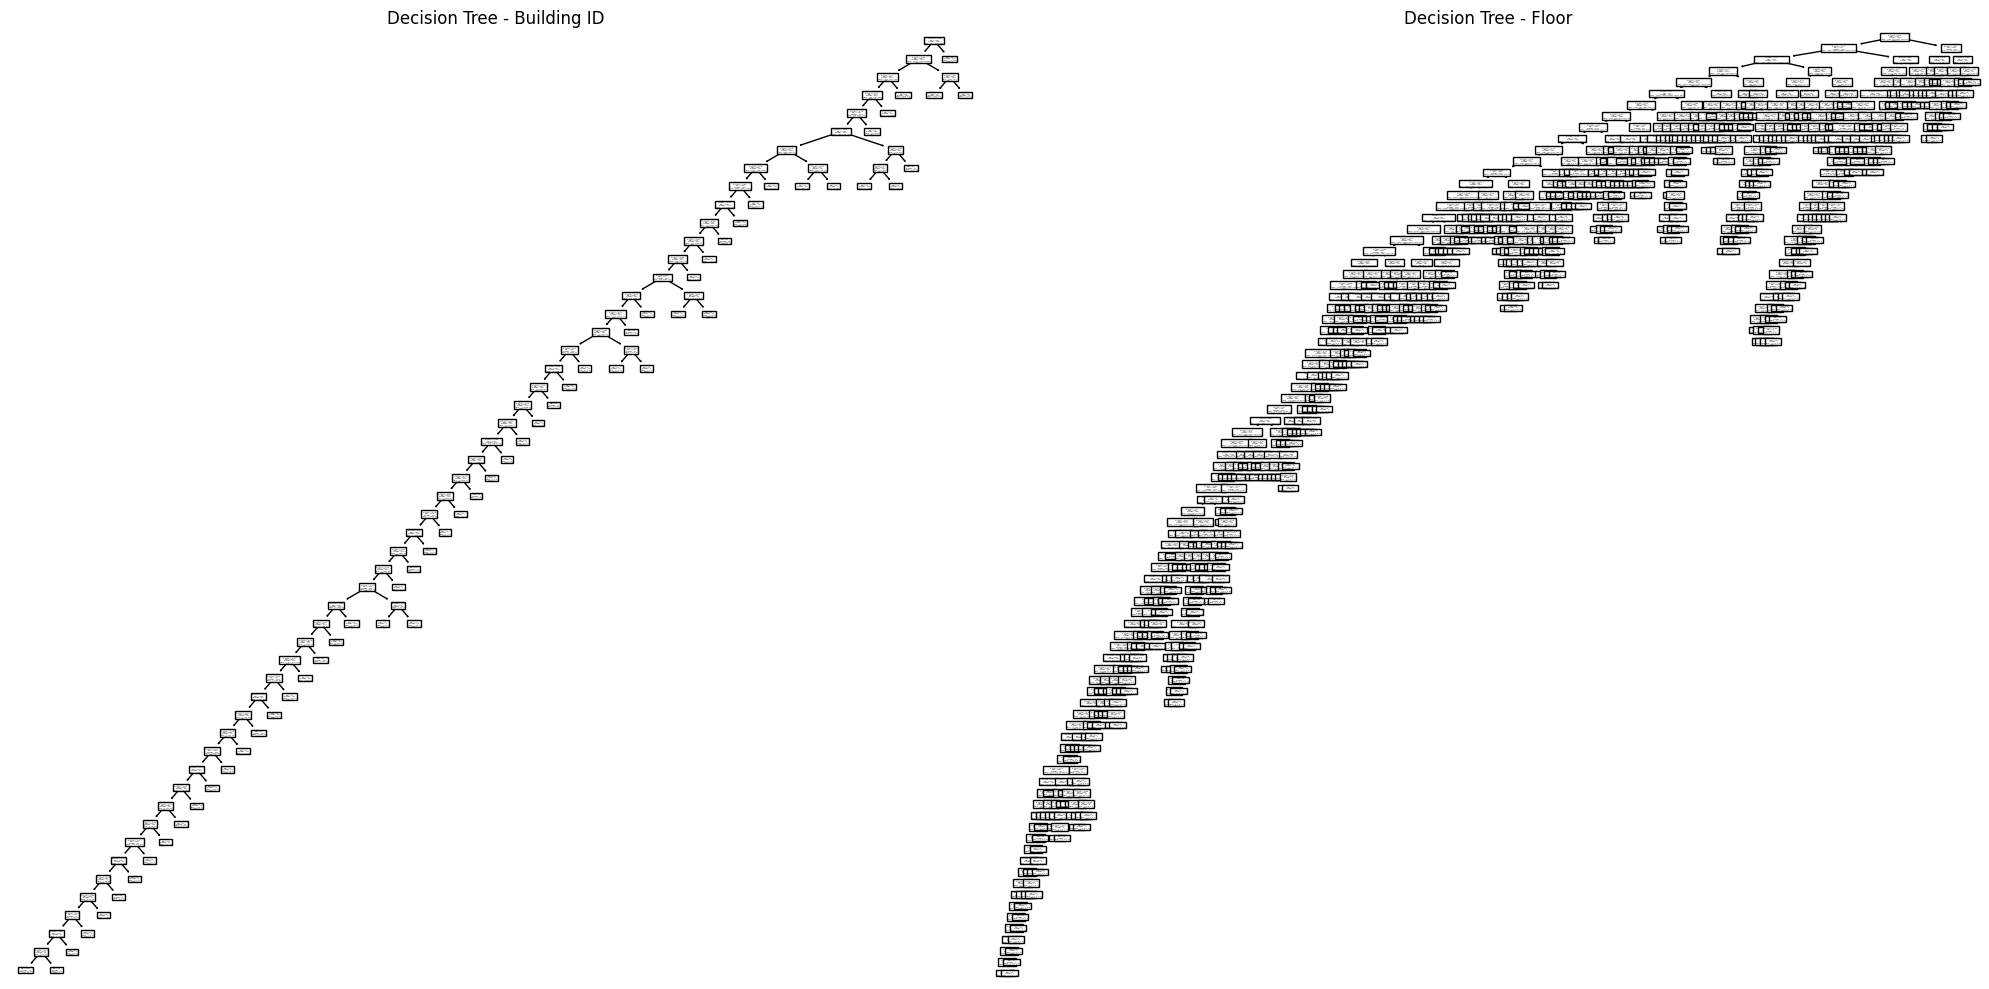

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Trees
tree_building = DecisionTreeClassifier(random_state=42)
tree_building.fit(X_train, yb_train)
tree_yb_pred = tree_building.predict(X_test)

tree_floor = DecisionTreeClassifier(random_state=42)
tree_floor.fit(X_train, yf_train)
tree_yf_pred = tree_floor.predict(X_test)

# Confusion Matrix Heatmap Subplots
plt.figure(figsize=(20, 10))
combined_trees = [(tree_building, "Building ID"), (tree_floor, "Floor")]

for i, (tree_model, title) in enumerate(combined_trees):
    plt.subplot(1, 2, i + 1)
    plot_tree(
        tree_model,
        feature_names=RSSI_columns,
        class_names=[str(c) for c in sorted(df[title.upper().replace(" ", "")].unique())],
    )
    plt.title(f"Decision Tree - {title}")

plt.tight_layout()
plt.show()

========= Building ID =========
Accuracy:            0.9977432296890673
Precision macro:     0.997029702970297
Precision micro:     0.9977432296890673
Precision weighted:  0.997763339523521
Recall macro:        0.9984284965950759
Recall micro:        0.9977432296890673
Recall weighted:     0.9977432296890673
F1 Score macro:      0.9977205965770567
F1 Score micro:      0.9977432296890673
F1 Score weighted:   0.9977456134709664
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1078
           1      0.991     1.000     0.996      1001
           2      1.000     0.995     0.998      1909

    accuracy                          0.998      3988
   macro avg      0.997     0.998     0.998      3988
weighted avg      0.998     0.998     0.998      3988

========= Floor =========
Accuracy:            0.9724172517552658
Precision macro:     0.9738232098706364
Precision micro:     0.9724172517552658
Precision weighted:  0.9724104813745901
Rec

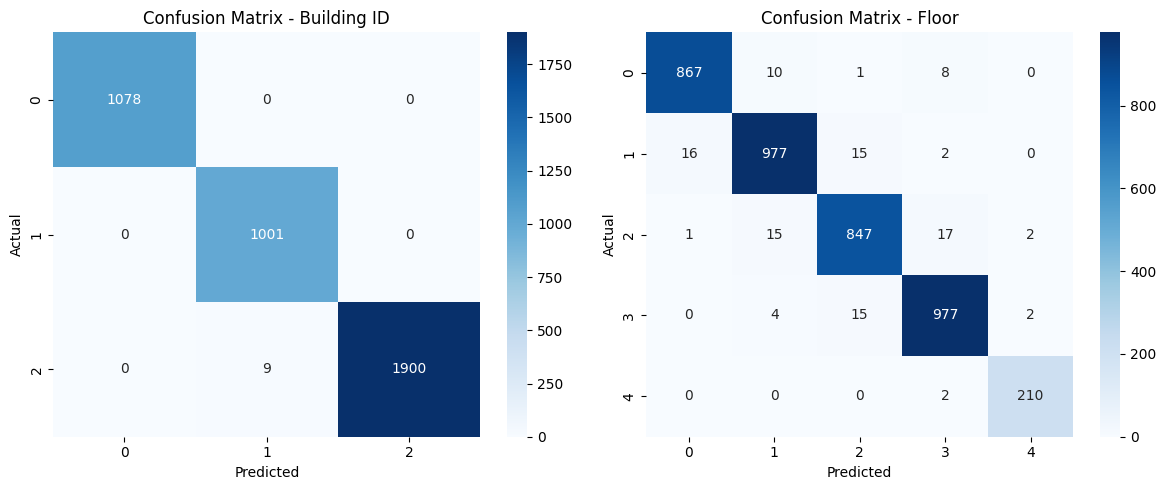

========= Records Identified Wrong =========


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,FLOOR,BUILDINGID
2247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284314,0.304762,...,0.0,0.0,0.0,0.0,0.000000,0.419048,0.0,0.0,3,2
4821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,2
10204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.514286,0.0,0.0,2,2
19927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.200000,0.266667,0.0,0.0,1,2
11945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.209524,0.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2,0
7537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.104762,0.000000,0.0,0.0,2,2
19538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3,1
4411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,1


In [47]:
evaluate_classification(yb_test, tree_yb_pred, yf_test, tree_yf_pred)

In [48]:
# Joy: ====================================================================================
# The metrics for one decision tree is already looking good. If we want a very quick model
# done on a slow computer, this is more than enough. For the sake of model development let's
# try more models
# =========================================================================================

📝 JOY if you have time try to put the manual decision trees from the lab 

### SVM

In [49]:
# Joy: ====================================================================================
# Usually PCA is performed on highdimensional data like this but I want to preserve the 
# feature columns so I'll try without it
# =========================================================================================

========= Building ID =========
Accuracy:            0.9979939819458375
Precision macro:     0.9973571192599934
Precision micro:     0.9979939819458375
Precision weighted:  0.9980098869452758
Recall macro:        0.998603108084512
Recall micro:        0.9979939819458375
Recall weighted:     0.9979939819458375
F1 Score macro:      0.9979733876549014
F1 Score micro:      0.9979939819458375
F1 Score weighted:   0.9979958679658674
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1078
           1      0.992     1.000     0.996      1001
           2      1.000     0.996     0.998      1909

    accuracy                          0.998      3988
   macro avg      0.997     0.999     0.998      3988
weighted avg      0.998     0.998     0.998      3988

========= Floor =========
Accuracy:            0.9932296890672017
Precision macro:     0.9936978415812712
Precision micro:     0.9932296890672017
Precision weighted:  0.9932436934527614
Re

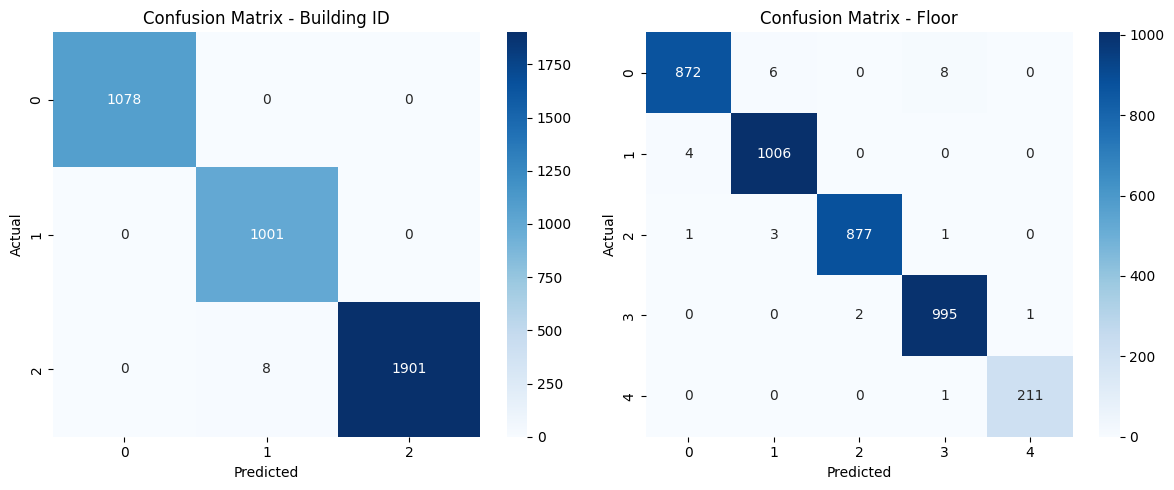

========= Records Identified Wrong =========


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,FLOOR,BUILDINGID
15099,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
695,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
4982,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
17166,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5274,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
16062,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5031,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
1739,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
14881,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [50]:
from sklearn.svm import SVC

# Train SVM for Building ID
svm_building = SVC(kernel='linear', C=1, random_state=42)
svm_building.fit(X_train, yb_train)
svm_yb_pred = svm_building.predict(X_test)

# Train SVM for Floor
svm_floor = SVC(kernel='linear', C=1, random_state=42)
svm_floor.fit(X_train, yf_train)
svm_yf_pred = svm_floor.predict(X_test)

evaluate_classification(yb_test, svm_yb_pred, yf_test, svm_yf_pred)

In [52]:
# Joy: ====================================================================================
# Even without performing PCA the results are still very good, better than decision trees. 
# =========================================================================================

In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # This idea to visualize this simpler version of SVM is from GPT

# # Fit PCA on the entire test set 
# pca = PCA(n_components=2)
# X_test_pca = pca.fit_transform(X_test)

# # Plot side-by-side
# plt.figure(figsize=(14, 6))

# # Subplot 1 – Building ID
# plt.subplot(1, 2, 1)
# plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=svm_yb_pred, cmap="viridis", alpha=0.6)
# plt.title("SVM Predictions (Building ID) in PCA Space")
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.grid(True)
# plt.colorbar(label="Predicted Building")

# # Subplot 2 – Floor
# plt.subplot(1, 2, 2)
# plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=svm_yf_pred, cmap="plasma", alpha=0.6)
# plt.title("SVM Predictions (Floor) in PCA Space")
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.grid(True)
# plt.colorbar(label="Predicted Floor")

# plt.tight_layout()
# plt.show()

# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# # Fit PCA with 3 components
# pca_3d = PCA(n_components=3)
# X_test_pca_3d = pca_3d.fit_transform(X_test)

# # Setup figure
# fig = plt.figure(figsize=(14, 6))

# # Subplot 1 – Building ID
# ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# sc1 = ax1.scatter(
#     X_test_pca_3d[:, 0], X_test_pca_3d[:, 1], X_test_pca_3d[:, 2],
#     c=yb_pred_svm, cmap="viridis", alpha=0.6
# )
# ax1.set_title("SVM Predictions (Building ID) - 3D PCA")
# ax1.set_xlabel("PC1")
# ax1.set_ylabel("PC2")
# ax1.set_zlabel("PC3")
# fig.colorbar(sc1, ax=ax1, shrink=0.5, label="Predicted Building")

# # Subplot 2 – Floor
# ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# sc2 = ax2.scatter(
#     X_test_pca_3d[:, 0], X_test_pca_3d[:, 1], X_test_pca_3d[:, 2],
#     c=yf_pred_svm, cmap="plasma", alpha=0.6
# )
# ax2.set_title("SVM Predictions (Floor) - 3D PCA")
# ax2.set_xlabel("PC1")
# ax2.set_ylabel("PC2")
# ax2.set_zlabel("PC3")
# fig.colorbar(sc2, ax=ax2, shrink=0.5, label="Predicted Floor")

# plt.tight_layout()
# plt.show()


# CHATGPT CODE

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("./UJIndoorLoc/trainingData.csv")

# List all Wi-Fi fingerprint columns (WAPs)
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]

# Replace "100" (no signal) with -105 (weaker than the weakest signal)
df[RSSI_columns] = df[RSSI_columns].replace(100, -105)

# Normalize WAP values (optional, scaling RSSI values between 0 and 1)
df[RSSI_columns] = (df[RSSI_columns] + 105) / 105

# Define features (Wi-Fi RSSI) and targets (Building ID & Floor)
X = df[RSSI_columns]  # Features: WAP signals
y_building = df["BUILDINGID"]  # Target 1: Building ID
y_floor = df["FLOOR"]  # Target 2: Floor

from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_building_train, y_building_test = train_test_split(X, y_building, test_size=0.2, random_state=42)
X_train, X_test, y_floor_train, y_floor_test = train_test_split(X, y_floor, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest model for Building ID
building_model = RandomForestClassifier(n_estimators=100, random_state=42)
building_model.fit(X_train, y_building_train)

# Predict on test set
y_building_pred = building_model.predict(X_test)

# Evaluate accuracy
building_accuracy = accuracy_score(y_building_test, y_building_pred)
print(f"Building ID Prediction Accuracy: {building_accuracy:.4f}")

# Train a Random Forest model for Floor
floor_model = RandomForestClassifier(n_estimators=100, random_state=42)
floor_model.fit(X_train, y_floor_train)

# Predict on test set
y_floor_pred = floor_model.predict(X_test)

# Evaluate accuracy
floor_accuracy = accuracy_score(y_floor_test, y_floor_pred)
print(f"Floor Prediction Accuracy: {floor_accuracy:.4f}")



Building ID Prediction Accuracy: 0.9980
Floor Prediction Accuracy: 0.9962


Decision Tree Accuracy for Building ID: 0.8736


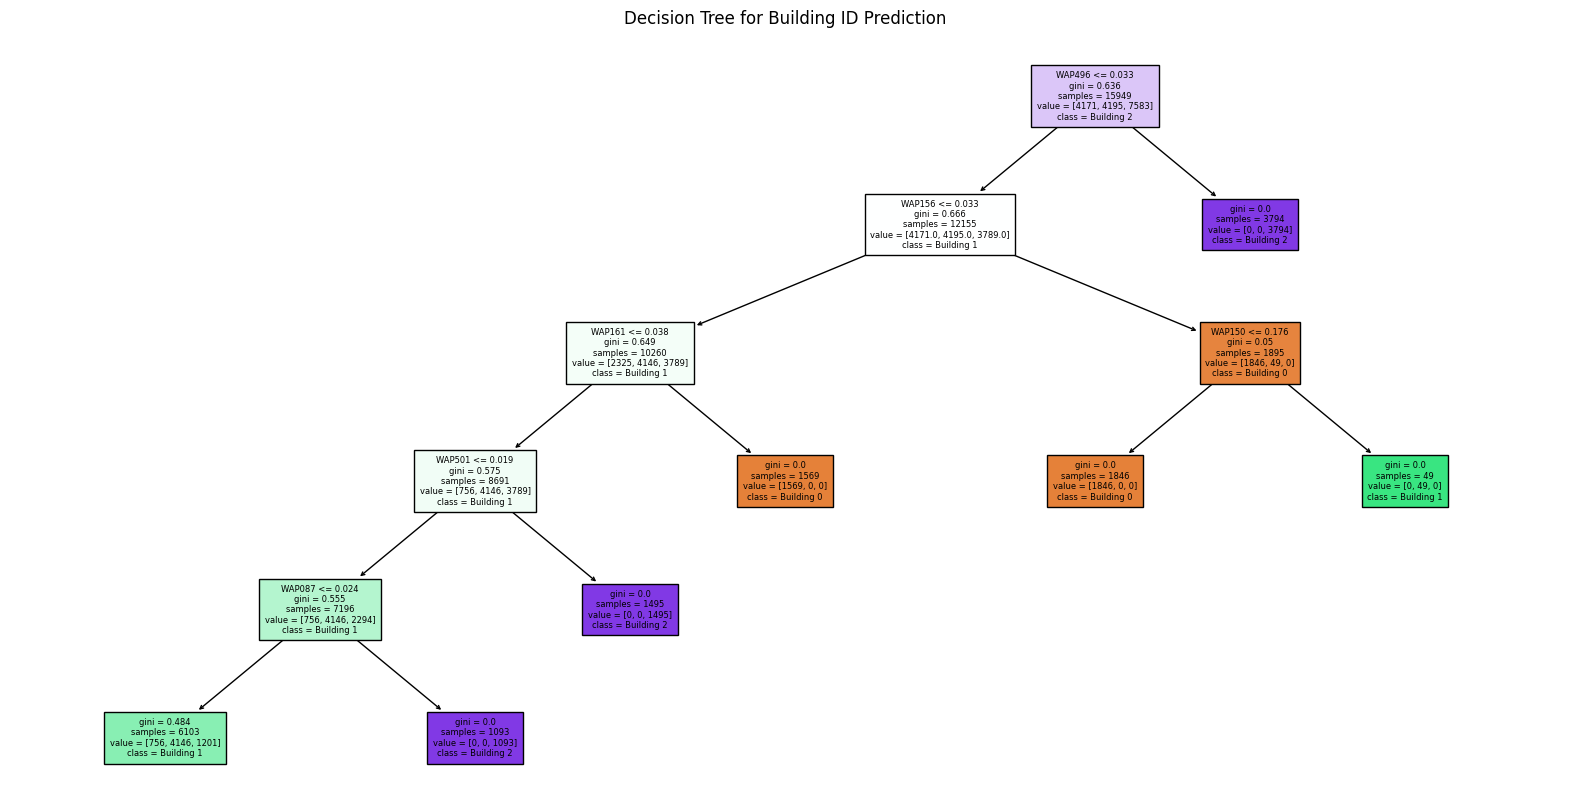

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("./UJIndoorLoc/trainingData.csv")

# List all Wi-Fi fingerprint columns (WAPs)
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]

# Replace "100" (no signal) with -105 (weaker than the weakest signal)
df[RSSI_columns] = df[RSSI_columns].replace(100, -105)

# Normalize WAP values (optional, scaling RSSI between 0 and 1)
df[RSSI_columns] = (df[RSSI_columns] + 105) / 105

# Define features (Wi-Fi RSSI) and target (Building ID)
X = df[RSSI_columns]  # Features: WAP signals
y_building = df["BUILDINGID"]  # Target: Building ID

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_building, test_size=0.2, random_state=42)

# Train a Decision Tree model for Building ID
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test set
y_pred = tree_model.predict(X_test)

# Evaluate accuracy
tree_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy for Building ID: {tree_accuracy:.4f}")

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=RSSI_columns, class_names=["Building 0", "Building 1", "Building 2"], filled=True, fontsize=6)
plt.title("Decision Tree for Building ID Prediction")
plt.show()


# Code not used

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (ensure correct path)
df = pd.read_csv("./UJIndoorLoc/trainingData.csv")

# Sort floors in ascending order
unique_floors = sorted(df['FLOOR'].unique())

# Create a figure with a 2-row, 3-column layout
fig = plt.figure(figsize=(16,8))

# Plot scatter plots for each floor in the grid
for idx, floor in enumerate(unique_floors, start=1):
    plt.subplot(2, 3, idx)  # 2 rows, 3 columns, current plot index
    floor_data = df[df['FLOOR'] == floor]
    
    # Scatter plot with SPACEID as color
    scatter = plt.scatter(
        floor_data['LONGITUDE'], floor_data['LATITUDE'],  plot with BUILDINGID as color
        c=floor_data['SPACEID'], alpha=0.1
    )
    
    plt.title(f'Floor {floor}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

# Adjust layout for better visualization
plt.suptitle('Wi-Fi Fingerprinting Data - Floors Overview (Colored by SPACEID)', fontsize=16)
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (2947760894.py, line 20)